# Mixtures of conjugate priors 01

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-25)_

## The spinning coin

<div><center><table class="image">
<caption align="top"><h1>Persi Diaconis</h1></caption>
<tr><td><img src="Persi.Diaconis.jpg" width="500"></td></tr>
</table></center></div>   

Stanford stat and math professor Persi Diaconis, formerly a professional magician, famously determined how many times a deck of cards  must be shuffled in order to give a mathematically random result (seven). He’s also dabbled in coin games. 

You might be interested in his 2013 video talk: [The Search for Randomness](https://www.youtube.com/watch?v=xit5LDwJVck)

The example below is taken from the paper by Persi Diaconis and Donald Ylvisaker (1985), _Quantifying prior opinion._
In: J.M. Bernardo et al (eds), _Bayesian Statistics 2,_ Elsevier Science Publishers B.V. (North-Holland) pp. 133-156.
A modified form of it appears in  Jim Albert (2009), Bayesian computation with R (2nd ed), Springer, pp. 49-52 (se Exercise below).

## The spinning coin

The problem investigated originates from the following fact: if a coin is spinned on its edge instead of being flipped, the proportion of heads or tails is not around 50% but rather such values as one third or two thirds are obtained.

<div><center><table class="image">
<tr><td><img src="spinning.coin.2.jpg" width="170"></td></tr>
</table></center></div>   

According to Diaconis, "the reasons for the bias are not hard to infer. The shape of the edge will be a strong determining factor - indeed, magicians have coins that are slightly shaved; the eye cannot detect the shaving, but the spun coin always comes up heads".

For $ n$ tosses of a spinning coin, the number $x$ of heads up is a $\operatorname{B}(n,\theta)$, and $\theta$'s prior pdf will typically be a bimodal function (i.e., presenting two local maxima). 

Hence it cannot be modelled with a $\operatorname{Beta}(\alpha,\beta)$, which has a single mode at:

$$
	\dfrac{\alpha-1}{\alpha+\beta-2}
$$

# Diaconis spinning coin - Computations

In [1]:
require(MASS) # for truehist
#install.packages("extraDistr", dependencies=TRUE, repos= "https://cloud.r-project.org")
require(extraDistr) # needed for the Beta-binomial predictive prior

Loading required package: MASS

Loading required package: extraDistr



In [2]:
N<-20000

## Theoretical prior pdf

### Mixture of two Beta distributions

We define two priors, one centered at 0.32 and another one at 0.68.

In [3]:
prior.a1<-10
prior.b1<-20
prior.a2<-20
prior.b2<-10
prior.gamma<-0.5

We can plot the two prior pdfs, which can be thought as two different populations of coins.

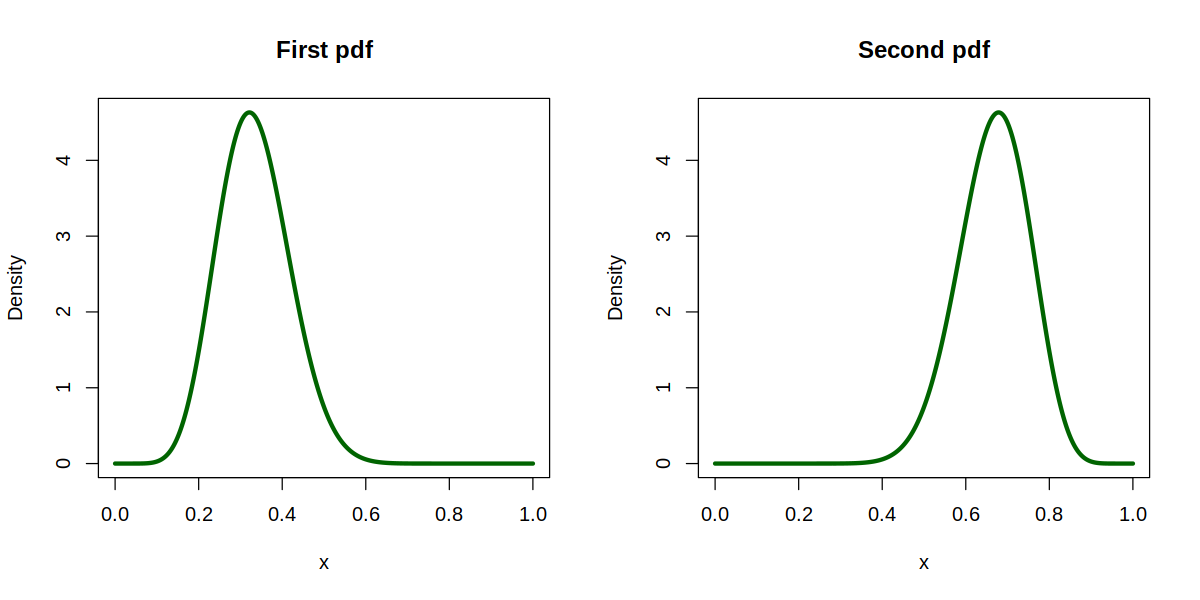

In [4]:
options(repr.plot.width=10,repr.plot.height=5)
v<-seq(0,1,length=500)
old.par<-par(mfrow=c(1,2))
plot(v,dbeta(v,prior.a1,prior.b1),type="l",lwd=3.5,col="DarkGreen",xlab="x",ylab="Density",main="First pdf")
plot(v,dbeta(v,prior.a2,prior.b2),type="l",lwd=3.5,col="DarkGreen",xlab="x",ylab="Density",main="Second pdf")
par(old.par)

NB. The mixture of two r.v., $X_{1}$, with pdf $f_{1}$, and $X_{2}$, with pdf $f_{2}$, and coefficients $(\lambda, 1-\lambda)$, $\lambda\in(0,1)$, is a r.v. with pdf $f=\lambda f_{1}+(1-\lambda) f_{2}$, which is NOT the same thing as the _sum_   

$$
    X=\lambda X_{1}+(1-\lambda) X_{2}. 
$$

We are not concerned the pdf of $X=\lambda X_{1}+(1-\lambda) X_{2}$. If you want to know, is the _convolution_ of the pdf's of its summands, not its sum. 

To facilitate things, we can define a function that computes the density at a given value of $\theta$.

In [5]:
mixture.prior.pdf<-function(theta){
    return(prior.gamma*dbeta(theta,prior.a1,prior.b1)+(1-prior.gamma)*dbeta(theta,prior.a2,prior.b2))
    }

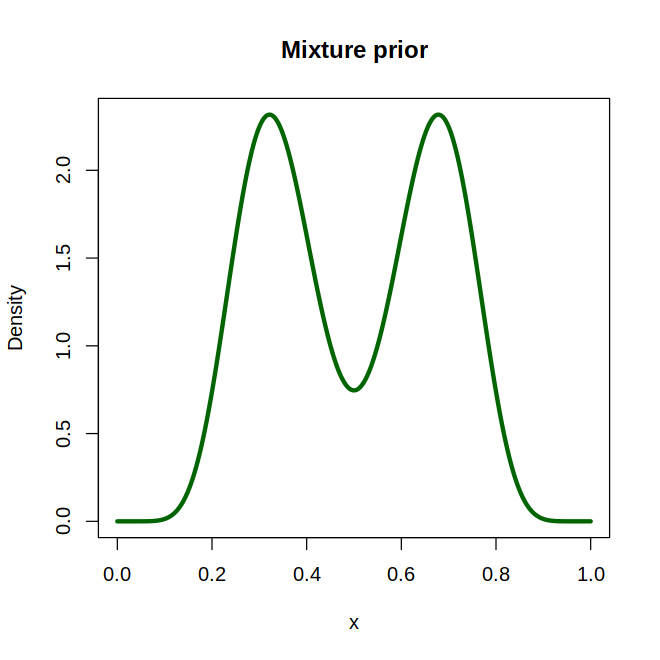

In [6]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
v<-seq(0,1,length=500)
plot(v,mixture.prior.pdf(v),type="l",lwd=3.5,col="DarkGreen",xlab="x",ylab="Density",main="Mixture prior")

Let's see how we can generate samples from this mixture. First, we sample N Bernoulli random numbers which will determine the component of the mixture that we will use next. Then, we sample a $\theta$ from the corresponding component. This can be done in vectorized form using:

In [7]:
# Generating random numbers following the mixture prior
Ind<-rbinom(N,size=1,prob=prior.gamma)
Sim.prior.theta<-Ind*rbeta(N,shape1=prior.a1,shape2=prior.b1)+(1-Ind)*rbeta(N,shape1=prior.a2,shape2=prior.b2)

We can check that the sample of $\theta$'s generated follows the theoretical distribution.

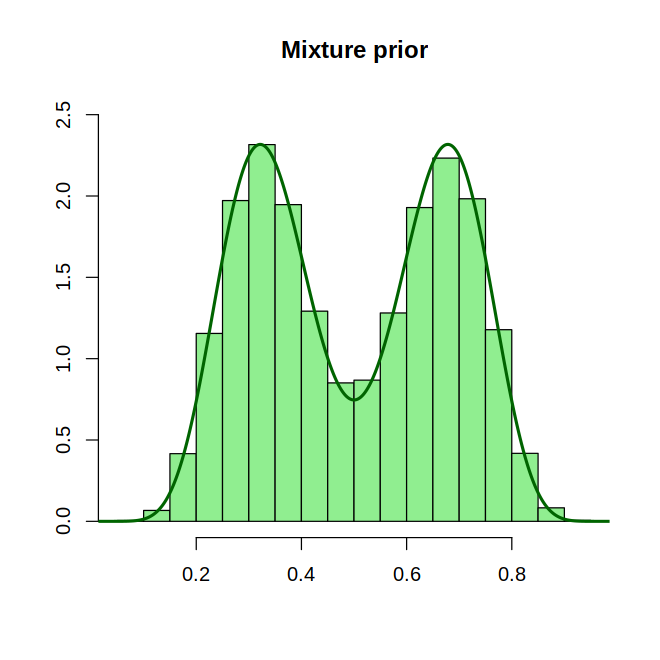

In [8]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
truehist(Sim.prior.theta,ylim=c(0,2.5),nbins=30,col="LightGreen",xlab="",ylab="",main="Mixture prior")
v<-seq(0,1,length=500)
lines(v,mixture.prior.pdf(v),lwd=2.5,col="DarkGreen")

## Simulated prior predictive pmf

Having generated a sample of $\theta$ from the prior, we can generate a sample of $X$ to see what the prior predictive distribution looks like.

In [15]:
n<-10
Sim.x.prior.pred<-rbinom(N,size=n,prob=Sim.prior.theta)

Tne pmf of $X$ will basically be a mixture of two beta-binomial distributions

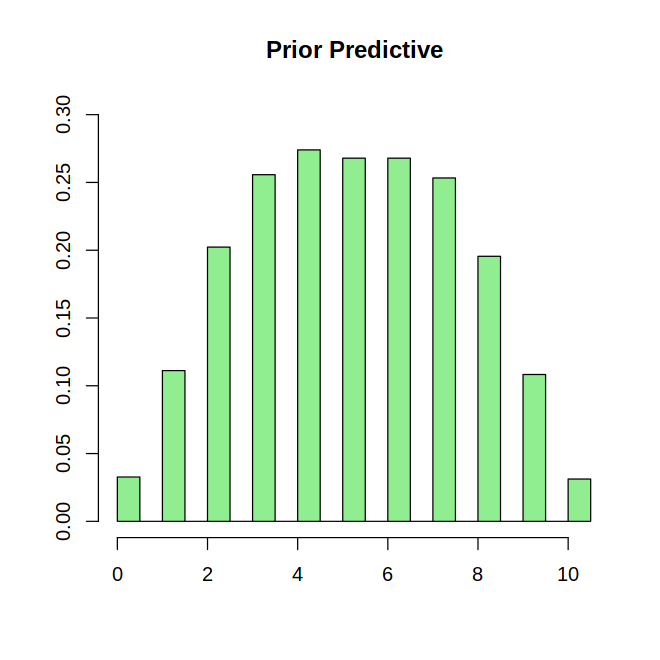

In [16]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
truehist(Sim.x.prior.pred,ylim=c(0,0.3),nbins=30,col="LightGreen",xlab="",ylab="",main="Prior Predictive")

Let's compare this histogram to the theoretical pmf that we obtain.

## Theoretical prior predictive pdf

Assume the prior pdf for $\theta$ is:

$$
	h(\theta)=\gamma\cdot h_{1}(\theta)+(1-\gamma)\cdot h_{2}(\theta),
$$

and the likelihood is $\textrm{Binom}(n,\theta)$: 

$$
        f(x\,|\,\theta)=\binom{n}{x}\, \theta^{x}\cdot(1-\theta)^{n-x},\mskip40mu x=0,1,\dots,n.
$$

We assume that both $h_{1}(\theta)$ and $h_{2}(\theta)$ belong to the conjugate family to the likelihood. Then, from the law of total probability, we have that the joint pdf is:

$$
	f(x,\theta)= \sum_{i=0,1} f(x,\theta,i) = \gamma\cdot f_{1}(x,\theta)+(1-\gamma)\cdot  f_{2}(x,\theta).
$$

where:

$$
	 f_{i}(x,\theta)=f(x\,|\,\theta)\cdot h_{i}(\theta),\quad i=1,2.
$$

Integrating out $\theta$, the marginal for $x$:

$$
    f(x)=\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x),
$$	

where:

$$
	f_{i}(x)=\int f(x\,|\,\theta)\cdot h_{i}(\theta)\,d\theta, \quad i=1,2.
$$

Thus, the prior predictive pdf is a mixture, a convex combination of two pdf's, _partial prior predictive pdf's,_ with the same coefficients, $\gamma$ and $1-\gamma$, as the prior. By virtue of the conjugacy property we assumed these partial prior predictive pdf's follow from the general formulas of the conjugate pair, so there is no need to explicitly integrate $\theta$ out. 

$$
\begin{align*}
	f_{1}\sim\operatorname{Beta-Binom}(n,\alpha_{1},\beta_{1})&=\operatorname{Beta-Binom}(10,10,20),\\
	f_{2}\sim\operatorname{Beta-Binom}(n,\alpha_{2},\beta_{2})&=\operatorname{Beta-Binom}(10,20,10),
\end{align*}
$$

In [17]:
f1<-function(x){dbbinom(x,size=n,alpha=prior.a1,beta=prior.b1)}
f2<-function(x){dbbinom(x,size=n,alpha=prior.a2,beta=prior.b2)}

In [18]:
Theor.prior.predictive.pmf<-function(x){
    return(prior.gamma*f1(x)+(1-prior.gamma)*f2(x))
    }

### Compare simulated and theoretical prior predictive pmf

First we estimate the pmf from the sample that we generated above:

In [13]:
# Use tabulate() since table() does not register empty bins (resulting table has only positive frequencies), 
# First parameter in tabulate() must be a vector of positive integers
T.Sim.x.prior.pred<-tabulate(Sim.x.prior.pred+1)
f.Sim.x.prior.pred<-T.Sim.x.prior.pred/N
# To recover the list of integers from 0 to the maximum integer with nonnull frequency
u<-(1:length(T.Sim.x.prior.pred))-1

Then, we obtain the theoretical value from the function we just defined:

In [14]:
ftu<-Theor.prior.predictive.pmf(u)
fsu<-f.Sim.x.prior.pred

Now we can compare the two and check that the two match:

fsu,0.016,0.053,0.1,0.128,0.134,0.133,0.137,0.129,0.097,0.058,0.015
ftu,0.016,0.055,0.1,0.128,0.134,0.134,0.134,0.128,0.100,0.055,0.016


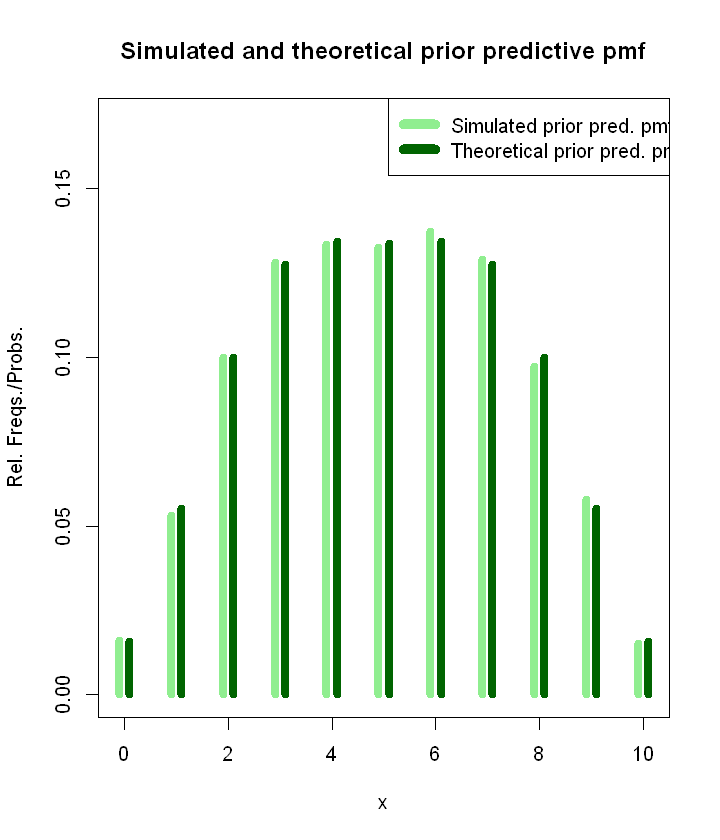

In [15]:
fstu<-cbind(fsu,ftu)
round(t(fstu),3)
options(repr.plot.width=6,repr.plot.height=7)
matplot(x=cbind(u-0.1,u+0.1),y=fstu,type="h",lwd=7, lty=1,col=c("LightGreen","DarkGreen"),
        ylim=c(0,0.17),xlab="x",ylab="Rel. Freqs./Probs.",
        main="Simulated and theoretical prior predictive pmf")
legend("topright",legend=c("Simulated prior pred. pmf","Theoretical prior pred. pmf"),
       lwd=8, lty=1,col=c("LightGreen","DarkGreen"))

As N increases, the distance between these two distributions converges to zero.

## Simulated posterior sample of $ \theta$

Let's do the same with the posterior of $\theta$. Assume we observed 3 heads:

In [20]:
# Observed x
x.obs<-3

We can get the indices for which we obtained this value in our previous sample and obtain the proportion of $\theta$ values that resulted in that $X$.

In [21]:
x.obs.indexes<-(Sim.x.prior.pred==x.obs)
N.post<-sum(x.obs.indexes)     # Posterior sample size
Prop.N.post<-N.post/N  
N.post
round(Prop.N.post,2)

[1] 2557

[1] 0.13

Using the indices we can recover the actual $\theta$ values that resulted in that $X$:

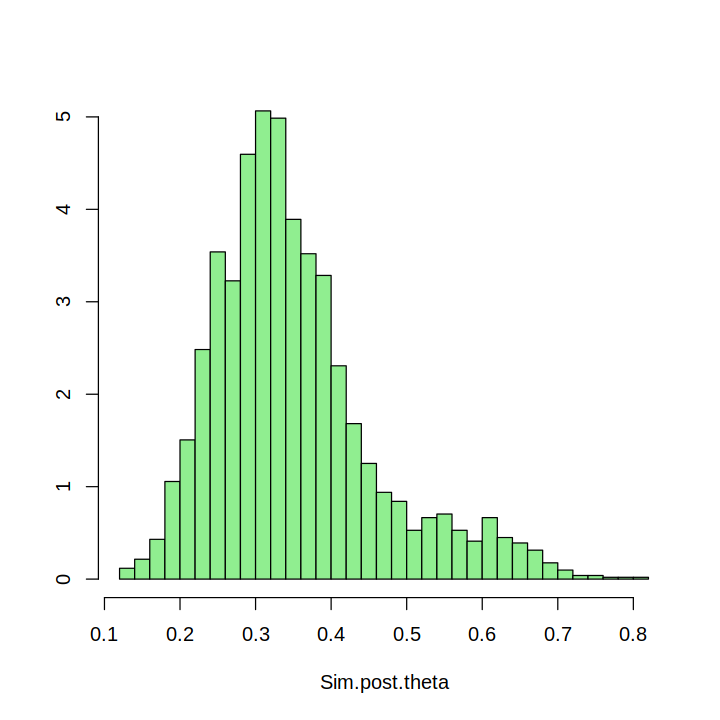

In [22]:
Sim.post.theta<-Sim.prior.theta[x.obs.indexes]
options(repr.plot.width=6,repr.plot.height=6)
truehist(Sim.post.theta,col="LightGreen",ylim=c(0,5))

This constitutes a sample from the posterior sample, which we can now compare to the theoretical one.

## Theoretical posterior pdf 

From Bayes' formula:

$$
    h(\theta\,|\,x)=\dfrac{f(x,\theta)}{f(x)}
        =\dfrac{\gamma\cdot f_{1}(x,\theta)+(1-\gamma)\cdot  f_{2}(x,\theta)}
            {\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x)}.
$$

Note that we already wrote down the numerator and denominator in the previous steps. We will use the obvious notation:

$$
    h_{i}(\theta\,|\,x)=\dfrac{f_{i}(x,\theta)}{f_{i}(x)}	\quad i=1,2.
$$

These functions are called _partial posterior pdf's._ 

Again, the conjugacy property allows us to derive them from the general formulas of the conjugate pair, that is, they belong to the same family as the priors with updated parameters.
The posterior pdf is:

$$
	h(\theta\,|\,x)=\widehat{\gamma}(x)\cdot h_{1}(\theta\,|\,x)
		+(1-\widehat{\gamma}(x))\cdot h_{2}(\theta\,|\,x),
$$

where the _posterior mixture weights_ are:

$$
	\widehat{\gamma}(x)=\dfrac{\gamma\cdot f_{1}(x)}{\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x)}
$$

and $1-\widehat{\gamma}(x)$. Now, these weight are not the same as those in the prior and, furthermore, **they depend on the observed data**. This might not seem obvious if you just look at the formula, since the weights are just a function of the prior predictive distributions. However, note that these are evaluated precisely at the observed value of $X$.

### Posterior weights

Let's get these weights in our example. We first evaluate the prior predictive distributions of each component of the mixture:

In [19]:
# for the observed x
f1x<-f1(x.obs)
f2x<-f2(x.obs)
round(f1x,4)
round(f2x,4)
#[1] 0.2276
#[1] 0.0277

[1] 0.2276

[1] 0.0277

Then, we define the posterior using the formula above, which also includes the prior weights. Note that if the observed data is very likely in the first prior predictive, then the weight for the first partial posterior will be larger, and viceversa.

In [20]:
posterior.gamma<-prior.gamma*f1x/(prior.gamma*f1x+(1-prior.gamma)*f2x)
round(posterior.gamma,4)
#[1] 0.8915

[1] 0.8915

In this case, since the likelihood of the observed data is much larger for the first partial prior predictive, we get a rather large posterior weight for the first component.

$$
    \widehat{\gamma}(x)=\dfrac{\gamma\cdot f_{1}(x)}{\gamma\cdot f_{1}(x)+(1-\gamma)\cdot f_{2}(x)}= 0.8915.
$$

### Partial posterior pdf's

Having defined the posterior weights, we can define the partial posterior distributions:

$$
\begin{array}{l}
	h_{1}\sim\operatorname{Beta}(\alpha_{1}+x,\beta_{1}+n-x)=\operatorname{Beta}(10+3,20+10-3)
        =\operatorname{Beta}(13,27),\\[0.3cm]
	h_{2}\sim\operatorname{Beta}(\alpha_{2}+x,\beta_{2}+n-x)=\operatorname{Beta}(20+3,10+10-3)
        =\operatorname{Beta}(23,17).
\end{array}
$$

In [21]:
posterior.a1<-prior.a1+x.obs
posterior.b1<-prior.b1+n-x.obs
posterior.a2<-prior.a2+x.obs
posterior.b2<-prior.b2+n-x.obs

In [22]:
sprintf("Posterior parameters for the first component: (%2.0d,%2.0d)",posterior.a1,posterior.b1)
sprintf("Posterior parameters for the second component: (%2.0d,%2.0d)",posterior.a2,posterior.b2)

[1] "Posterior parameters for the first component: (13,27)"

[1] "Posterior parameters for the second component: (23,17)"

### Theoretical posterior pdf

Having defined the posterior weights and the partial posteriors, we can define the theoretical posterior distribution of $\theta$:

In [23]:
mixture.posterior.pdf<-function(theta){
    return(posterior.gamma*dbeta(theta,posterior.a1,posterior.b1)
    +(1-posterior.gamma)*dbeta(theta,posterior.a2,posterior.b2))}

$$
    0.8915\,\operatorname{Beta}(13,27)+0.1085\,\operatorname{Beta}(23,17).
$$

Since the weight of the first component is much larger, the posterior is heavily influenced by the first component of the prior, resulting in most of the mass overlapping this component.

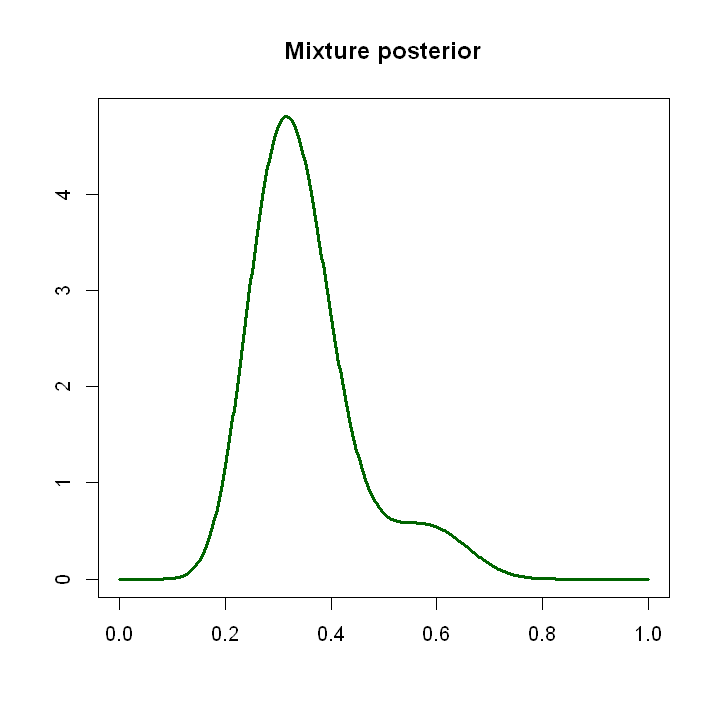

In [24]:
# Plot the posterior pdf
options(repr.plot.width=6,repr.plot.height=6)
v<-seq(0,1,length=500)
plot(v,mixture.posterior.pdf(v),"l",lwd=2.5,col="DarkGreen",xlab="",ylab="",main="Mixture posterior")

### Compare simulated posterior sample and theoretical posterior pdf

Having the theoretical distribution available, we can compare it to the histogram that we obtained earlier to see that they agree with each other.

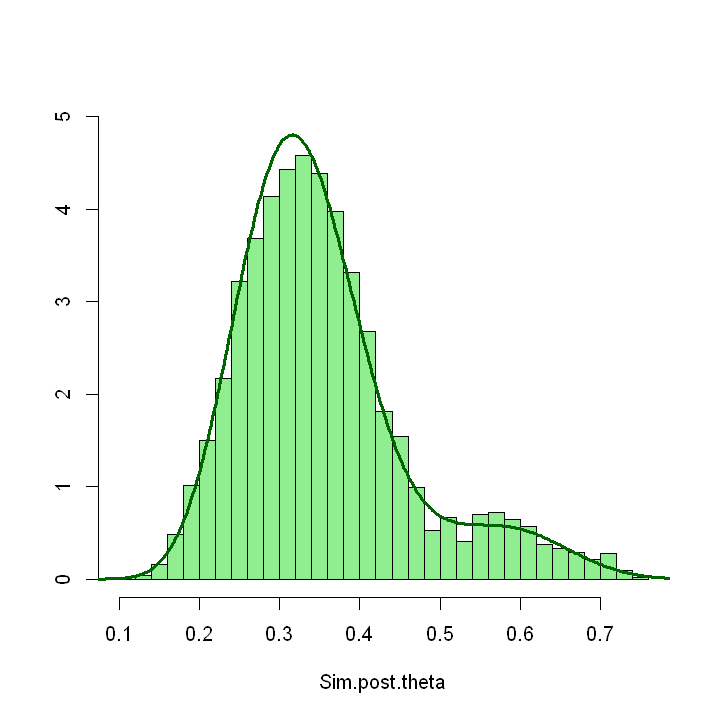

In [25]:
options(repr.plot.width=6,repr.plot.height=6)
truehist(Sim.post.theta,col="LightGreen",ylim=c(0,5))
lines(v,mixture.posterior.pdf(v),lwd=2.5,col="DarkGreen",xlab="",ylab="",main="Mixture posterior")

### Posterior expectation, var, sd

From the sample that we generated we can obtain different descriptive statistics:

In [26]:
Expected.post.theta<-mean(Sim.post.theta)
var.post.theta<-var(Sim.post.theta)
sd.post.theta<-sd(Sim.post.theta)
round(Expected.post.theta,3)
round(var.post.theta,3)
round(sd.post.theta,3)

[1] 0.355

[1] 0.012

[1] 0.109

## MAP estimator of $ \theta$

The posterior distribution attains its maximum value where $ \operatorname{Beta}(13,27)$ (first partial posterior) does:

$$
    \hat{\theta}_{MAP}=\dfrac{13-1}{13+27-2}=0.3158,
$$

which may be compared with the classical ML estimator:

$$
    \hat{\theta}_{ML}=\dfrac{x}{n}=0.4286,
$$

and the lower mode of the prior distribution:

$$
    m_{1}=\dfrac{10-1}{10+20-2}=0.3214.
$$

Note that the ML estimator is much closer to 0.5.

## Credible interval with a given probability

The easiest way to obtain an interval $ [a,b]$ of $\theta$ values such that its posterior probability is a given value, e.g., $\pi=0.95$ is to use a random sample from the posterior distribution.

Taking it quantile-symmetrical, i.e., such that both tails have probability $(1-\pi)/2=0.025$, the interval is:

In [27]:
p<-0.95
q<-(1-p)/2
round(quantile(Sim.post.theta,p=c(q,p+q)),4)
#  2.5%  97.5% 
#0.1932 0.6400

2.5%  97.5% 
0.1925 0.6385